In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from plotnine import *
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs


N = 5000
x1 = np.random.normal(1.5, 1, N)
y1 = np.random.normal(1.6, 1, N)
x2 = np.random.normal(2.5, 1, N)
y2 = np.random.normal(2.2, 1, N)

df = pd.DataFrame({'x': np.append(x1, x2), 'y': np.append(y1, y2)})
df


C:\QMDownload\anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.


,x,y
0,-0.280652,1.545448
1,0.720186,1.845869
2,3.559860,-0.061559
3,2.145404,0.869496
4,1.895308,1.258349
...,...,...
9995,4.460361,5.553972
9996,1.342386,2.722652
9997,0.164317,2.581355
9998,0.962124,0.455062


-3.151065061831064 6.805634847875446 -2.9864423346211457 6.747940265962715


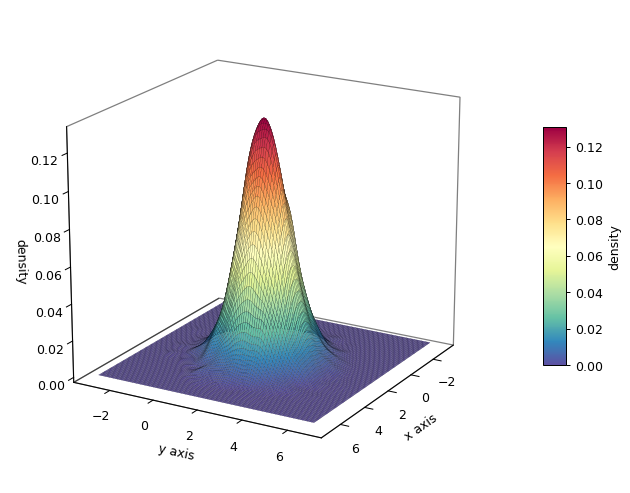

In [2]:
# Extract x and y
x = df.x.values
y = df.y.values
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]


positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
Z = np.reshape(kernel(positions), X.shape)


fig = plt.figure(figsize=(9, 7), dpi=90)
#ax = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection='3d')
ax.view_init(azim=30, elev=20)  # 改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴
ax.grid(False)
ax.xaxis._axinfo['tick']['outward_factor'] = 0
ax.xaxis._axinfo['tick']['inward_factor'] = 0.4
ax.yaxis._axinfo['tick']['outward_factor'] = 0
ax.yaxis._axinfo['tick']['inward_factor'] = 0.4
ax.zaxis._axinfo['tick']['outward_factor'] = 0
ax.zaxis._axinfo['tick']['inward_factor'] = 0.4
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='Spectral_r', alpha=1, edgecolor='k', linewidth=0.1)
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("density")
# ax.set_zlim(50,170)
cbar = fig.colorbar(p, shrink=0.5, aspect=10)
cbar.set_label('density')
# fig.savefig('三维核密度估计曲面图2.pdf')
